In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

2024-10-29 18:02:01.770335: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
df_raw = pd.concat([X,y], axis=1)
df_raw.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2
99,5.7,2.8,4.1,1.3,1
97,6.2,2.9,4.3,1.3,1
138,6.0,3.0,4.8,1.8,2
125,7.2,3.2,6.0,1.8,2


**1ra condicion**

Para correr TensorFlow el `target` debe ser numerico (encode)

**2da condicion**

- Los datos deben estar escalado (en lo posible)
- Si los datos tienen una forma parecida a la normal, utilizar StandardScaler
- Si tiene sesgo o presentan una distribución no uniforme, usar MinMaxScaler

In [3]:
df = df_raw.copy()

df_train, df_test = train_test_split(df, test_size= 0.2, random_state=2024)

X_train = df_train.drop('target', axis=1).reset_index(drop=True)
y_train = df_train['target'].reset_index(drop=True)
X_test = df_test.drop('target', axis=1).reset_index(drop=True)
y_test = df_test['target'].reset_index(drop=True)

In [4]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.870833,0.843103,4.3,5.175,5.80,6.5,7.9
sepal width (cm),120.0,3.055833,0.413389,2.0,2.800,3.00,3.3,4.2
petal length (cm),120.0,3.821667,1.752270,1.0,1.600,4.35,5.1,6.7
petal width (cm),120.0,1.222500,0.757535,0.1,0.300,1.30,1.8,2.5


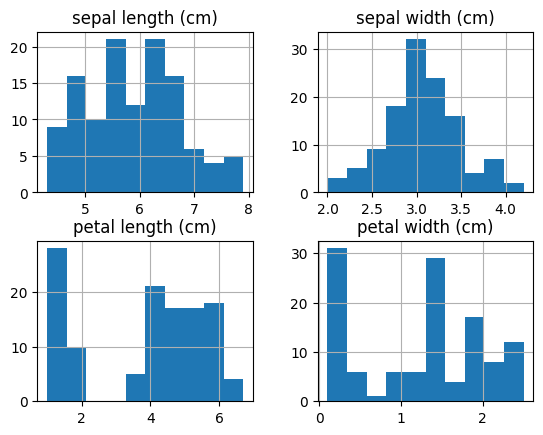

In [5]:
X_train.hist()
plt.show()

In [6]:
# Scaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [7]:
model = Sequential([
    Dense(64, input_shape=(X_test_scaler.shape[1], ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') #softmax calcula la mayor probabilidad
])

/Users/rodripinedo/Documents/4GEEKS/repos/my_bootcamp/Deep_Learnig/machine_learning_project_deep_learning/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,499 (9.76 KB)

 Trainable params: 2,499 (9.76 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.fit(X_train_scaler, y_train, epochs=50, batch_size=32, validation_data= (X_test_scaler, y_test))

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8508 - loss: 0.4838 - val_accuracy: 0.8333 - val_loss: 0.4540
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8177 - loss: 0.4666 - val_accuracy: 0.8333 - val_loss: 0.4283
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8608 - loss: 0.4449 - val_accuracy: 0.8333 - val_loss: 0.4062
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8444 - loss: 0.4228 - val_accuracy: 0.8333 - val_loss: 0.3871
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8871 - loss: 0.3825 - val_accuracy: 0.8333 - val_loss: 0.3702
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8340 - loss: 0.4085 - val_accuracy: 0.8333 - val_loss: 0.3553
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8852 - loss: 0.3457 - val_accuracy: 0.8333 - val_loss: 0.3409
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8950 - loss: 0.3504 - val_accuracy: 0.8333 - val_loss: 0.3281
E

In [11]:
# Evaluate
loss, accuracy = model.evaluate(X_test_scaler, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.9333 - loss: 0.1787
Loss: 0.17866843938827515, Accuracy: 0.9333333373069763
